<a href="https://colab.research.google.com/github/MurtuzaShaikh26/AI-ML-GDG-SkillSprint/blob/main/colab_notebook/AI_ML_GDG%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time to do some actual ML on a real-world dataset!!




We are going to learn how to predict Student Performance using Multi-Variate Linear Regression. Every algorithm in Machine Learning can be implemented from basics using Numpy and Pandas, as well as using in-built functions from Sci-kit Learn. We will explore both approaches.                                                   You can find the link of the dataset here --> [Student Performance Dataset](https://docs.google.com/spreadsheets/d/1VsUVXoulim1SFBxlw4xNure4NNELFqx8nBK-zPwOwp0/edit?usp=sharing)



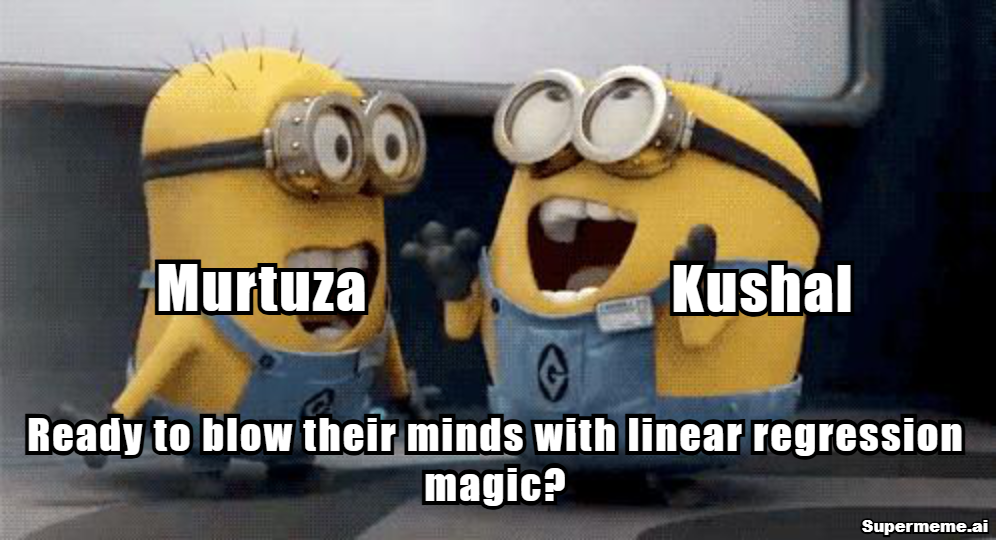

# 1) Implementation from Scratch(the more interesting one)



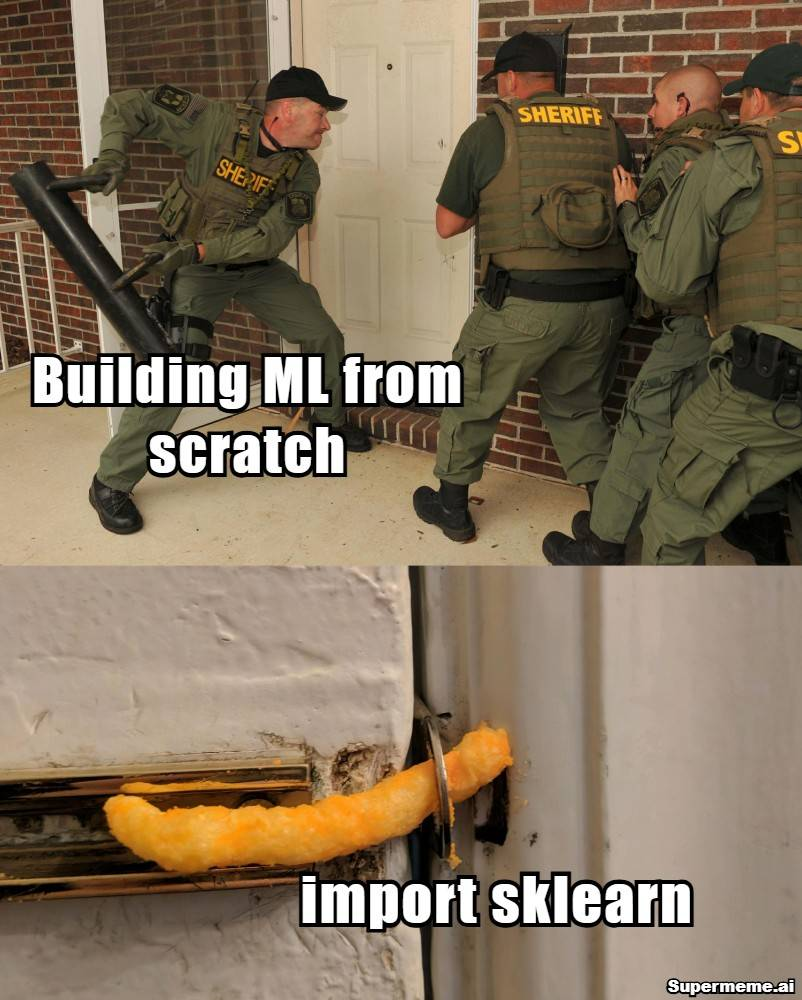

Step 1: Import the necessary libraries








In [51]:
import numpy as np
# Numpy is used for doing mathematical operations on your data efficiently
import pandas as pd
# Pandas is used to extract and store your dataset for ML Algorithms
import matplotlib.pyplot as plt
# Matplotlib is used to plot and visualize results

# For reproducibility
np.random.seed(42)


Step 2: Loading your dataset into a dataframe from the csv file.
(PS- Make sure you download the dataset from the above link and upload it into the sample data folder, after clicking on the file icon in the left task bar)

In [52]:
# Copy the file path of the csv and paste it here
df = pd.read_csv("/content/sample_data/StudentPerformanceFactors.csv")

# We are selecting only these columns from the dataset.
features = [
    "Hours_Studied",
    "Attendance",
    "Sleep_Hours",
    "Previous_Scores"
]
#This is our target feature that we want to predict, using the above input features
target = "Exam_Score"

X = df[features].values
y = df[target].values




In [53]:
display_df = df[features + [target]].head(5)

print("First 5 examples (Features + Target):")
display(display_df)

First 5 examples (Features + Target):


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Exam_Score
0,23,84,7,73,67
1,19,64,8,59,61
2,24,98,7,91,74
3,29,89,8,98,71
4,19,92,6,65,70


Step 3: Split the dataset into 2 parts, Train and Test

In [54]:
# We will use 1000 examples for our Linear Regression Model
X = X[:1000]
y = y[:1000]

# First 800 for training the model
X_train = X[:800]
y_train = y[:800]

# Next 200 for testing the trained model's performance
X_test = X[200:]
y_test = y[200:]




In [55]:
# We are adding a column into the dataset that has 1 as it's entry --> [1,x1,x2,x3,x4]

X_train_final = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_final = np.c_[np.ones(X_test.shape[0]), X_test]


Step 4: Initializing the parameters (weights) and hyper-parameters(learning rate and no. of epochs)

In [56]:
# Number of features (+1 for bias)
n_features = X_train_final.shape[1]

# Initialize weights to zero
weights = np.zeros(n_features)

learning_rate = 0.0001
epochs = 3000


Step 5: Running the training loop and storing the loss values

In [57]:
loss_history = []

for epoch in range(epochs):

    # Make the prediction
    y_pred = X_train_final.dot(weights)

    # Find the error between the predicted values and actual values
    error = y_pred - y_train

    # Add the error of all examples, square it and find the mean
    loss = np.mean(error ** 2)
    loss_history.append(loss)

    # Find the gradient term for updating the weights
    gradients = (2 / len(y_train)) * X_train_final.T.dot(error)

    # Update the weights
    weights -= learning_rate * gradients

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.2f}")


Epoch 0, Loss: 4530.97
Epoch 500, Loss: 113998356953115314673949065770277211540000888562932570636746537715608009999011918165297327717523400808850942979713883395777131319919763757286895810930353512686804860210593155400780073664512.00
Epoch 1000, Loss: inf
Epoch 1500, Loss: inf
Epoch 2000, Loss: nan
Epoch 2500, Loss: nan


/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipython-input-1447499646.py:12: RuntimeWarning: overflow encountered in square
  loss = np.mean(error ** 2)
/tmp/ipython-input-1447499646.py:19: RuntimeWarning: invalid value encountered in subtract
  weights -= learning_rate * gradients


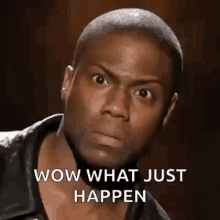

You've faced this problem for the first time... Hurrah!!!


Your loss value exploded because your learning rate was just higher than it should have been. Why this happens?  

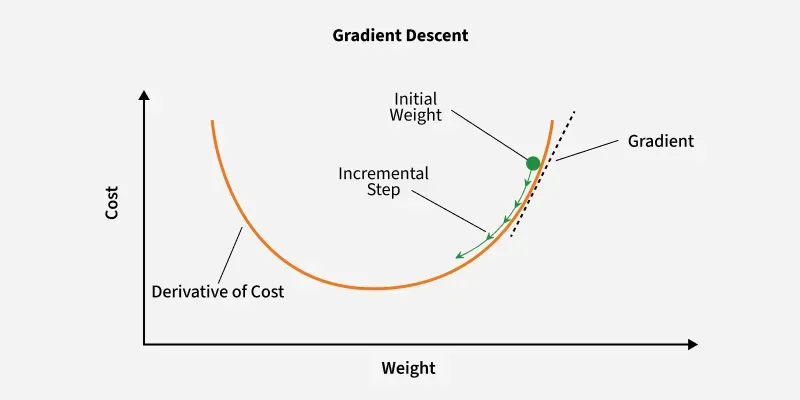

We will make the learning rate smaller so that the weights don't overshoot the minima.



In [58]:
# Re-initialize weights to zero
weights = np.zeros(n_features)

learning_rate = 0.0000001   # small because values are not normalized
epochs = 3000

In [59]:
loss_history = []
pred_history = []   # stores (epoch, y_pred_copy)

for epoch in range(epochs):

    # Prediction
    y_pred = X_train_final.dot(weights)

    # Error
    error = y_pred - y_train

    # Mean Squared Error
    loss = np.mean(error ** 2)
    loss_history.append(loss)

    # Gradient
    gradients = (2 / len(y_train)) * X_train_final.T.dot(error)

    # Update weights
    weights -= learning_rate * gradients

    # Save predictions every 500 epochs
    if epoch % 500 == 0:
        pred_history.append((epoch, y_pred.copy()))
        print(f"Epoch {epoch}, Loss: {loss:.4f}")



Epoch 0, Loss: 4530.9700
Epoch 500, Loss: 398.5345
Epoch 1000, Loss: 69.7822
Epoch 1500, Loss: 43.3723
Epoch 2000, Loss: 41.0020
Epoch 2500, Loss: 40.5505


The loss function is decreasing now and approaching 0, so that means you can try increasing the learning rate a bit so that we are able to approach 0 faster. Play with the values and observe what happens.



Step 6: Visualize Results and Test your Model on the test set.

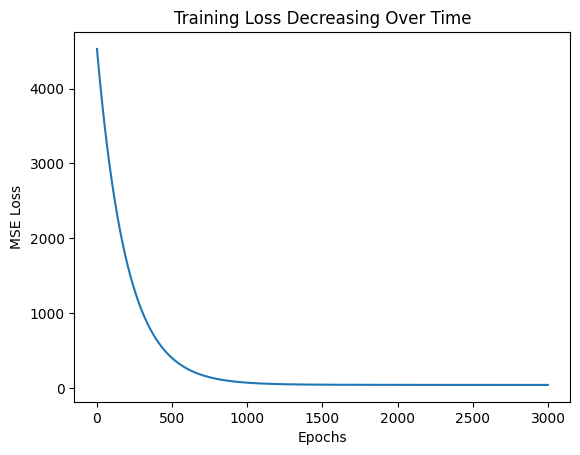

In [60]:
plt.figure()
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss Decreasing Over Time")
plt.show()


In [61]:
y_test_pred = X_test_final.dot(weights)

test_mse = np.mean((y_test_pred - y_test) ** 2)
print("Test MSE:", test_mse)


Test MSE: 40.08178749361724


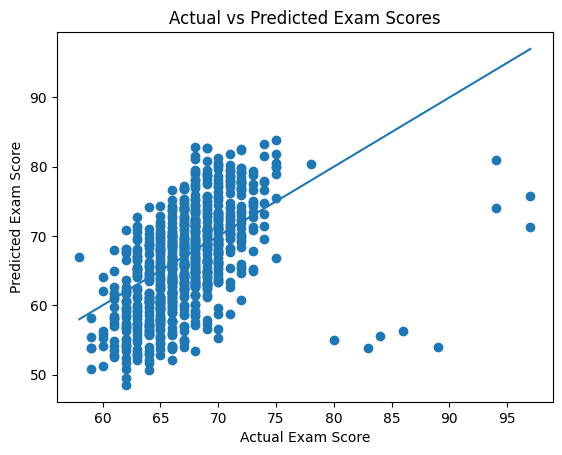

In [62]:
plt.figure()
plt.scatter(y_test, y_test_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.show()


In [63]:
# Extract x values (without bias column)
x_train = X_train_final[:, 1]

# Sort x for a clean line plot
x_line = np.linspace(x_train.min(), x_train.max(), 100)


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


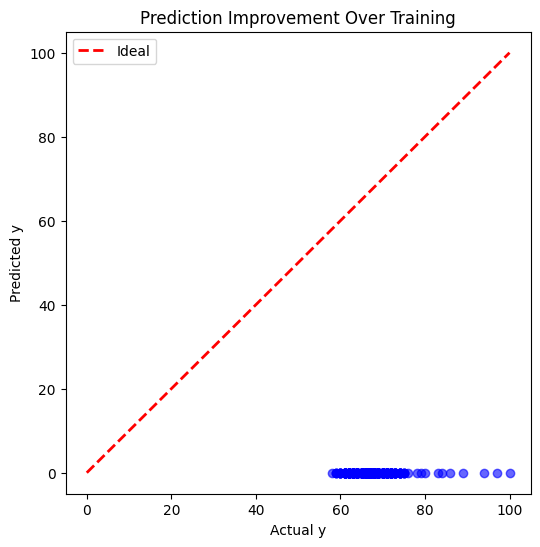

In [65]:
fig, ax = plt.subplots(figsize=(6, 6))

# Initial predictions
_, y_pred0 = pred_history[0]

scatter = ax.scatter(y_train, y_pred0, color='blue', alpha=0.6)

# Ideal y = x line
min_y = min(y_train.min(), y_pred0.min())
max_y = max(y_train.max(), y_pred0.max())
ax.plot([min_y, max_y], [min_y, max_y], 'r--', linewidth=2, label='Ideal')

epoch_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
ax.set_title("Prediction Improvement Over Training")
ax.legend()



In [66]:
ax.set_xlim(min_y, max_y)
ax.set_ylim(min_y, max_y)



(0.0, 100.0)

In [67]:
def update(frame):
    epoch, y_pred = pred_history[frame]

    scatter.set_offsets(np.c_[y_train, y_pred])
    epoch_text.set_text(f"Epoch: {epoch}")

    return scatter, epoch_text


In [68]:
ani = FuncAnimation(
    fig,
    update,
    frames=len(pred_history),
    interval=300,
    blit=False
)

HTML(ani.to_jshtml())




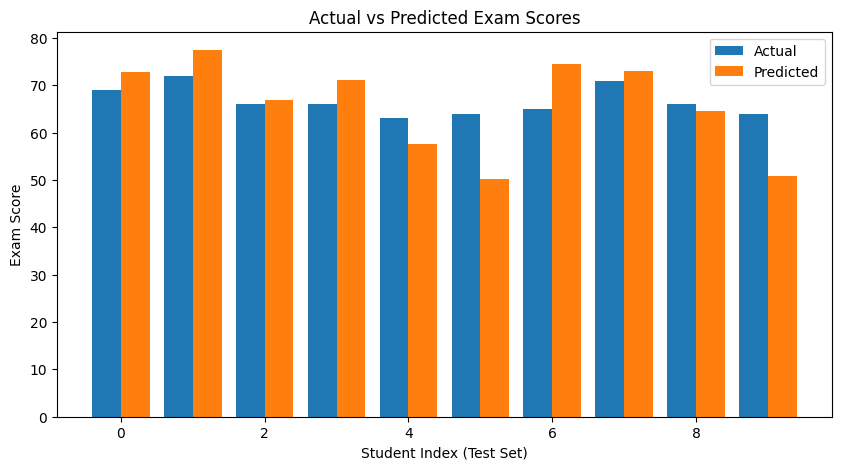

In [ ]:
indices = np.arange(len(y_test))

plt.figure(figsize=(10,5))
plt.bar(indices - 0.2, y_test, width=0.4, label="Actual")
plt.bar(indices + 0.2, y_test_pred, width=0.4, label="Predicted")
plt.xlabel("Student Index (Test Set)")
plt.ylabel("Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.legend()
plt.show()


# 2) Implementation using Sci-kit Learn
Scikit Learn is the holy grail for Implementing ML Algorithms in way fewer lines. Do explore about different models you may never have heard about --> [Scikit Learn Documentation](https://scikit-learn.org/stable/supervised_learning.html)

Step 1: Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error



Step 2: Store the data and extract the features

In [ ]:
df = pd.read_csv("/content/sample_data/StudentPerformanceFactors.csv")

features = [
    "Hours_Studied",
    "Attendance",
    "Sleep_Hours",
    "Previous_Scores"
]

target = "Exam_Score"

X = df[features].values
y = df[target].values

Step 3: Split between Train and Test

In [ ]:
# Take only first 30 samples
X = X[:30]
y = y[:30]

# First 20 → training
X_train = X[:20]
y_train = y[:20]

# Next 10 → testing
X_test = X[20:]
y_test = y[20:]


Step 4: Initialize the model and fit the data

(PS: Scikit Learn merges Step 4 and Step 5 of the scratch implementation)

In [ ]:
model = SGDRegressor(
    learning_rate="constant",
    eta0=0.0001,               # same as scratch learning rate
    max_iter=3000,             # same as epochs
    tol=None,                  # disable early stopping
    fit_intercept=True,        # bias term
    random_state=42
)


In [ ]:
model.fit(X_train, y_train)



SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=3000,
             random_state=42, tol=None)

These are the final trained weights and bias of the Linear Regression Model.

Insights:
1) According to the model, having a good sleep has a very important role in how well you do in exams.
2) Previous score does not determine the current exams performance as much as the other factors.
3) Attending classes is more important than self studying.


In [ ]:
print("Intercept (bias):", model.intercept_[0])
print("Weights:")

for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef}")


Intercept (bias): 1.3442556539144415
Weights:
Hours_Studied: 0.29869846119474874
Attendance: 0.4870803438443824
Sleep_Hours: 2.5174319136408085
Previous_Scores: 0.0017574274760927553


Step 5: Test your model and visualize results

In [ ]:
y_test_pred = model.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:", test_mse)


Test MSE: 66.7711294965197


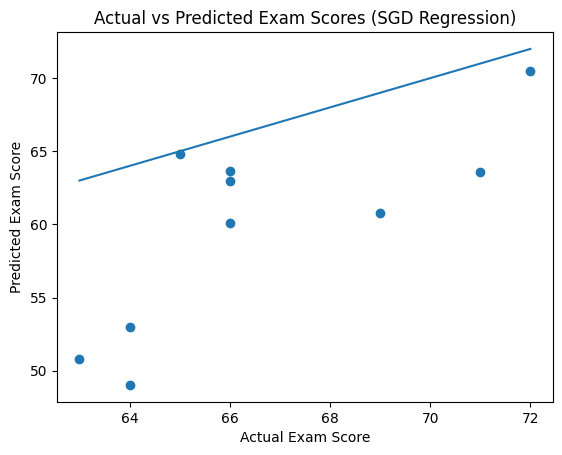

In [ ]:
plt.figure()
plt.scatter(y_test, y_test_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores (SGD Regression)")
plt.show()


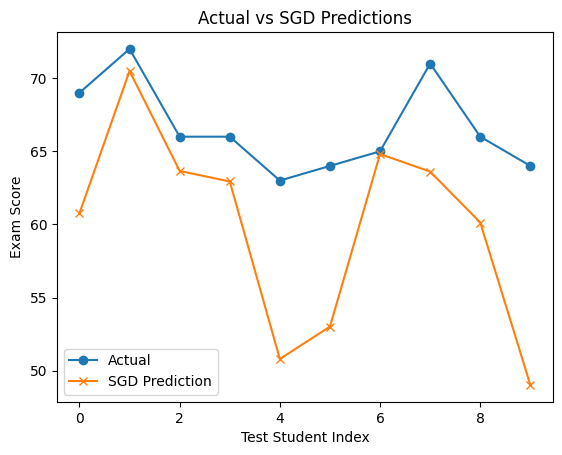

In [ ]:
plt.figure()
plt.plot(y_test, label="Actual", marker="o")
plt.plot(y_test_pred, label="SGD Prediction", marker="x")
plt.xlabel("Test Student Index")
plt.ylabel("Exam Score")
plt.title("Actual vs SGD Predictions")
plt.legend()
plt.show()


How can we improve the model (Food for thought)?

1) Include more data points to train.
2) Normalize the feature values. (How does that help??)
3) Include more features from the dataset that affect the exam score.
4) Increase the number of epoch's.
5) Why only a simple linear equation y=w1x1+w2x2...? Add terms that have higher power, but remember to adjust the equation while calculating the gradient (gradient would change upon changing the model equation).


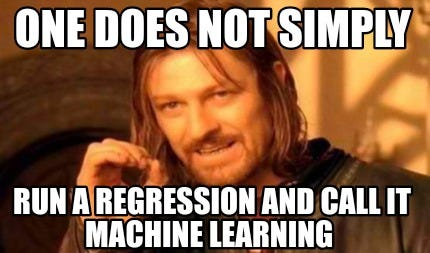

Try these different models and see which one performs the best.
1) Decision Tree Regressor
2) Random Forest Regressor
3) K- Nearest Neighbour Regressor
4) Neural Network